### 二维旋转矩阵的复合

旋转角为  $ \theta $  的矩阵记为  
\begin{aligned}
R(\theta)
&=
\begin{pmatrix}
\cos\theta & -\sin\theta \\[4pt]
\sin\theta & \cos\theta
\end{pmatrix}
\end{aligned}

先转  $ \beta $  再转  $ \alpha $  等价于直接转  $ \alpha+\beta $：


\begin{aligned}
R(\alpha)\,R(\beta)
&=
\begin{pmatrix}
\cos\alpha & -\sin\alpha \\[4pt]
\sin\alpha & \cos\alpha
\end{pmatrix}
\begin{pmatrix}
\cos\beta & -\sin\beta \\[4pt]
\sin\beta & \cos\beta
\end{pmatrix} \\[6pt]
&=
\begin{pmatrix}
\cos\alpha\cos\beta-\sin\alpha\sin\beta &
-\cos\alpha\sin\beta-\sin\alpha\cos\beta \\[4pt]
\sin\alpha\cos\beta+\cos\alpha\sin\beta &
-\sin\alpha\sin\beta+\cos\alpha\cos\beta
\end{pmatrix} \\[6pt]
&=
\begin{pmatrix}
\cos(\alpha+\beta) & -\sin(\alpha+\beta) \\[4pt]
\sin(\alpha+\beta) & \cos(\alpha+\beta)
\end{pmatrix} \\[6pt]
&= R(\alpha+\beta).
\end{aligned}


**结论**：连续两次二维旋转等于一次转角相加的旋转。

- $ ||R(\theta)||=1 $，行列式为1
- 乘以一个向量
    - 不改变其长度
    - 只改变其角度（只进行旋转）
    - 为逆时针旋转
        - 旋转角度$\theta$为其与$x$轴正方向的夹角

基本性质  
  - 行列式  
    $
    \det R(\theta)=\cos^2\theta+\sin^2\theta=1
    $  
    因此 **R(θ) 是体积保持的线性变换**。  
  - 对任意向量 **v**∈ℝ²，  
    $
    \|R(\theta)\mathbf v\|=\|\mathbf v\|,
    $  
    即**不改变长度，只改变方向**。  
  - 旋转方向：θ>0 时**逆时针**旋转；θ<0 时顺时针。


一个具体例子：θ=90°<br/><br/>$R\!\bigl(\tfrac\pi2\bigr)=
\begin{pmatrix}
0 & -1 \\[2pt]
1 & 0
\end{pmatrix}$把标准基向量 **e₁**=[1,0]ᵀ 映到 **e₂**=[0,1]ᵀ：$R\!\bigl(\tfrac\pi2\bigr)\mathbf e_1=
\begin{pmatrix}0\\1\end{pmatrix}=\mathbf e_2.$
<br/><br/>这正是“逆时针转 90°”的几何事实。

对任意非零向量 **a**, **b**，它们的夹角 θ 满足$
\cos\theta=\frac{\mathbf a\cdot\mathbf b}{\|\mathbf a\|\,\|\mathbf b\|}.
$<br/>旋转矩阵 R(θ) 就是当 ‖a‖=‖b‖ 时把 **a** 转到 **b** 的“最短旋转”算子

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rot_matrix(theta):
    return np.asarray([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

In [3]:
x = np.asarray([1,0])

In [4]:
# 逆时针30°旋转算子
R1 = rot_matrix(np.pi/6)

In [6]:
R1

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [8]:
x_prime = R1.dot(x)
x_prime

array([0.8660254, 0.5      ])

(-0.5, 1.5)

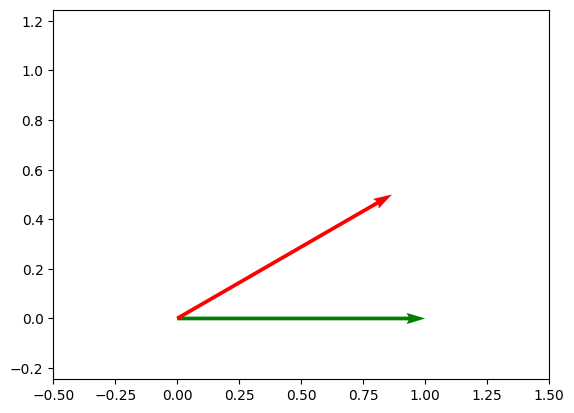

In [9]:
plt.quiver([0, 0], [0, 0], [x[0], x_prime[0]], [x[1], x_prime[1]], 
           angles="xy", scale_units="xy", scale=1, color=['g', 'r'])
plt.axis('equal')
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)